In [30]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')


## Data Collection

In [31]:
vehicle= pd.read_csv('vehicle.csv')
accident= pd.read_csv('accident.csv')
lsoa = pd.read_csv('lsoa.csv')
casualty = pd.read_csv('casuaty.csv')

## Data Assessment 
**Most data either have Data Tidyness or Data Quality issues, hence, I will inspect the data for :**
- Data Tidyness Issues
- Data Quality Issues 

In [32]:
#set to show all the columns
pd.set_option('display.max_columns', None)

In [33]:
accident.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2017010001708,2017,10001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,3,05/08/2017,7,03:12,32,E09000010,E09000010,3,105,6,30,0,-1,-1,-1,0,0,4,1,1,0,0,1,1,2,E01001450
1,2017010009342,2017,10009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,1,01/01/2017,1,01:30,1,E09000033,E09000033,3,5,6,30,3,4,6,0,0,0,4,1,2,0,0,1,1,2,E01004702
2,2017010009344,2017,10009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,1,01/01/2017,1,00:30,5,E09000030,E09000030,3,13,6,30,3,4,5,0,0,0,4,1,1,0,0,1,1,2,E01004298
3,2017010009348,2017,10009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,1,01/01/2017,1,01:11,32,E09000010,E09000010,3,1010,1,30,1,4,4,154,0,4,4,2,2,0,0,1,1,2,E01001429
4,2017010009350,2017,10009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,1,01/01/2017,1,01:42,4,E09000012,E09000012,3,107,3,20,6,2,3,10,0,5,4,1,2,0,0,1,1,2,E01001808


In [34]:
vehicle.head()

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,0,2017010001708,2017,10001708,1,9,0,18,1,5,0,0,0,0,0,0,1,1,6,1,24,5,1997,2,1,-1,-1,-1
1,1,2017010001708,2017,10001708,2,2,0,18,1,5,0,0,1,0,0,0,2,1,6,1,19,4,-1,-1,-1,-1,-1,-1
2,2,2017010009342,2017,10009342,1,9,0,18,5,1,0,1,0,0,0,0,2,1,6,1,33,6,1797,8,8,-1,9,1
3,3,2017010009342,2017,10009342,2,9,0,18,5,1,0,1,1,0,0,0,1,1,6,1,40,7,2204,2,12,-1,2,1
4,4,2017010009344,2017,10009344,1,9,0,18,3,7,0,1,0,0,0,0,1,1,6,3,-1,-1,-1,-1,-1,-1,-1,-1


In [35]:
lsoa.head()

,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,1,E01000001,City of London 001A,City of London 001A,1.298652e+05,2635.772001,68cc6127-1008-4fbe-a16c-78fb089a7c43
1,2,E01000002,City of London 001B,City of London 001B,2.284189e+05,2707.986202,937edbc3-c1bf-4d35-b274-b0a1480a7c09
2,3,E01000003,City of London 001C,City of London 001C,5.905477e+04,1224.774479,2686dcaf-10b9-4736-92af-4788d4feaa69
3,4,E01000004,City of London 001D,City of London 001D,2.544551e+06,10718.466240,3c493140-0b3f-4b9a-b358-22011dc5fb89
4,5,E01000005,City of London 001E,City of London 001E,1.895782e+05,2275.809358,b569093d-788d-41be-816c-d6d7658b2311


In [36]:
casualty.head()

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,0,2017010001708,2017,010001708,1,1,2,2,18,4,3,0,0,1,0,0,9,1,2
1,1,2017010001708,2017,010001708,2,2,1,1,19,4,2,0,0,0,0,0,2,-1,-1
2,2,2017010001708,2017,010001708,2,3,2,1,18,4,1,0,0,0,0,0,2,-1,-1
3,3,2017010009342,2017,010009342,1,1,2,2,33,6,3,0,0,1,0,0,9,1,5
4,4,2017010009344,2017,010009344,3,1,1,2,31,6,3,0,0,0,0,0,9,1,5


In [37]:
print(accident.shape)
print(vehicle.shape)
print(lsoa.shape)
print(casualty.shape)

(461352, 36)
(849091, 28)
(34378, 7)
(600332, 19)


In [38]:
print(f"Columns in accident data are: {accident.columns}\n"
      "-------------------------------------------------\n"
      f"Columns present in vehicle data are: {vehicle.columns}\n"
      "-------------------------------------------------\n"
      f"Columns present in lsoa data are: {lsoa.columns}\n"
      "-------------------------------------------------\n"
      f"Columns present in casualty data are: {casualty.columns}\n")


Columns in accident data are: Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')
--------------------------------------------

In [39]:

print(accident.dtypes)

accident_index                                  object
accident_year                                    int64
accident_reference                              object
location_easting_osgr                          float64
location_northing_osgr                         float64
longitude                                      float64
latitude                                       float64
police_force                                     int64
accident_severity                                int64
number_of_vehicles                               int64
number_of_casualties                             int64
date                                            object
day_of_week                                      int64
time                                            object
local_authority_district                         int64
local_authority_ons_district                    object
local_authority_highway                         object
first_road_class                                 int64
first_road

In [40]:
print(vehicle.dtypes)

vehicle_index                        int64
accident_index                      object
accident_year                        int64
accident_reference                  object
vehicle_reference                    int64
vehicle_type                         int64
towing_and_articulation              int64
vehicle_manoeuvre                    int64
vehicle_direction_from               int64
vehicle_direction_to                 int64
vehicle_location_restricted_lane     int64
junction_location                    int64
skidding_and_overturning             int64
hit_object_in_carriageway            int64
vehicle_leaving_carriageway          int64
hit_object_off_carriageway           int64
first_point_of_impact                int64
vehicle_left_hand_drive              int64
journey_purpose_of_driver            int64
sex_of_driver                        int64
age_of_driver                        int64
age_band_of_driver                   int64
engine_capacity_cc                   int64
propulsion_

In [41]:
print(lsoa.dtypes)

objectid           int64
lsoa01cd          object
lsoa01nm          object
lsoa01nmw         object
shape__area      float64
shape__length    float64
globalid          object
dtype: object


In [42]:
print(casualty.dtypes)

casualty_index                         int64
accident_index                        object
accident_year                          int64
accident_reference                    object
vehicle_reference                      int64
casualty_reference                     int64
casualty_class                         int64
sex_of_casualty                        int64
age_of_casualty                        int64
age_band_of_casualty                   int64
casualty_severity                      int64
pedestrian_location                    int64
pedestrian_movement                    int64
car_passenger                          int64
bus_or_coach_passenger                 int64
pedestrian_road_maintenance_worker     int64
casualty_type                          int64
casualty_home_area_type                int64
casualty_imd_decile                    int64
dtype: object


In [43]:
print(accident.duplicated().sum())
print(vehicle.duplicated().sum())
print(lsoa.duplicated().sum())
print(casualty.duplicated().sum())

0
0
0
0


In [44]:
print(accident.isnull().sum())

accident_index                                   0
accident_year                                    0
accident_reference                               0
location_easting_osgr                          116
location_northing_osgr                         116
longitude                                      126
latitude                                       126
police_force                                     0
accident_severity                                0
number_of_vehicles                               0
number_of_casualties                             0
date                                             0
day_of_week                                      0
time                                             0
local_authority_district                         0
local_authority_ons_district                     0
local_authority_highway                          0
first_road_class                                 0
first_road_number                                0
road_type                      

In [45]:
print(vehicle.isnull().sum())

vehicle_index                       0
accident_index                      0
accident_year                       0
accident_reference                  0
vehicle_reference                   0
vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_direction_from              0
vehicle_direction_to                0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
hit_object_in_carriageway           0
vehicle_leaving_carriageway         0
hit_object_off_carriageway          0
first_point_of_impact               0
vehicle_left_hand_drive             0
journey_purpose_of_driver           0
sex_of_driver                       0
age_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
driver_imd_d

In [46]:
print(lsoa.isnull().sum())

objectid         0
lsoa01cd         0
lsoa01nm         0
lsoa01nmw        0
shape__area      0
shape__length    0
globalid         0
dtype: int64


In [47]:
print(casualty.isnull().sum())

casualty_index                        0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64


In [48]:
print(f'Years of Accident occurence')
print(accident['accident_year'].unique())
print(vehicle['accident_year'].unique())
#print(lsoa['accident_year'].unique())
print(casualty['accident_year'].unique())

Years of Accident occurence
[2017 2018 2019 2020]
[2017 2018 2019 2020]
[2017 2018 2019 2020]


##### Inspect the variables descriptive statistics

In [49]:
accident.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
count,461352.000000,461236.000000,4.612360e+05,461226.000000,461226.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000
mean,2018.368378,452593.115756,2.801803e+05,-1.246998,52.408849,28.193388,2.784436,1.840441,1.301245,4.108171,324.427242,4.213852,773.579577,5.200413,36.898871,3.193629,1.748006,2.697335,220.470081,0.262112,1.099518,2.036235,1.649918,1.385239,0.217519,0.170518,1.325463,1.334877,1.680147
std,1.091566,94822.718705,1.515501e+05,1.389702,1.365101,24.801609,0.443648,0.709869,0.746398,1.927216,256.810667,1.465905,1575.278195,1.698629,14.013945,9.635082,2.535687,3.137408,927.475025,1.460680,2.333113,1.724691,1.819426,0.955180,1.240981,1.121964,0.469057,0.556352,0.851554
min,2017.000000,64084.000000,1.023500e+04,-7.525273,49.912362,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2017.000000,388539.000000,1.755300e+05,-2.172668,51.465689,5.000000,3.000000,1.000000,1.000000,2.000000,82.000000,3.000000,0.000000,6.000000,30.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,2018.000000,459198.500000,2.208650e+05,-1.126264,51.870257,22.000000,3.000000,2.000000,1.000000,4.000000,303.000000,4.000000,27.000000,6.000000,30.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
75%,2019.000000,529290.000000,3.865510e+05,-0.136389,53.372899,45.000000,3.000000,2.000000,1.000000,6.000000,512.000000,6.000000,514.000000,6.000000,40.000000,3.000000,4.000000,6.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000
max,2020.000000,655391.000000,1.209512e+06,1.759641,60.763722,99.000000,3.000000,24.000000,59.000000,7.000000,941.000000,6.000000,9176.000000,9.000000,70.000000,99.000000,9.000000,9.000000,9177.000000,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,3.000000,3.000000,2.000000


In [50]:
vehicle.describe()

,vehicle_index,accident_year,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
count,849091.000000,849091.000000,849091.000000,849091.000000,849091.000000,849091.000000,849091.000000,849091.000000,849091.000000,849091.000000,849091.000000,849091.000000,849091.00000,849091.000000,849091.000000,849091.000000,849091.000000,849091.000000,849091.000000,849091.000000,849091.000000,849091.000000,849091.000000,849091.000000,849091.000000
mean,424545.000000,2018.367693,1.560201,9.919154,0.186483,16.745490,4.300950,4.339601,4.616092,2.482244,0.640003,4.976518,0.73085,4.890526,1.922144,1.336589,4.679909,1.465472,35.230026,5.893647,1408.005845,0.992076,5.749201,3.793211,0.811947
std,245111.603045,1.090652,1.705475,10.731438,1.221928,19.089002,2.629313,2.619161,20.465322,3.194240,2.041929,20.932092,2.22230,20.558336,1.586829,1.603511,1.965837,0.669050,20.716743,3.132842,1605.009043,1.493908,6.121082,3.529226,1.117056
min,0.000000,2017.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,212272.500000,2017.000000,1.000000,9.000000,0.000000,7.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,2.000000,1.000000,23.000000,5.000000,124.000000,1.000000,0.000000,1.000000,1.000000
50%,424545.000000,2018.000000,1.000000,9.000000,0.000000,18.000000,4.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,6.000000,1.000000,35.000000,6.000000,1395.000000,1.000000,5.000000,4.000000,1.000000
75%,636817.500000,2019.000000,2.000000,9.000000,0.000000,18.000000,7.000000,7.000000,0.000000,5.000000,0.000000,0.000000,0.00000,0.000000,3.000000,1.000000,6.000000,2.000000,50.000000,8.000000,1951.000000,2.000000,10.000000,7.000000,1.000000
max,849090.000000,2020.000000,999.000000,99.000000,9.000000,99.000000,9.000000,9.000000,99.000000,9.000000,9.000000,99.000000,9.00000,99.000000,9.000000,9.000000,6.000000,3.000000,102.000000,11.000000,99999.000000,12.000000,96.000000,10.000000,3.000000


In [51]:
lsoa.describe()

,objectid,shape__area,shape__length
count,34378.000000,3.437800e+04,34378.000000
mean,17189.500000,4.484756e+06,8672.586392
std,9924.218114,1.497949e+07,11186.682402
min,1.000000,1.836184e+04,794.752314
25%,8595.250000,2.804555e+05,3329.866718
50%,17189.500000,4.843540e+05,4605.231856
75%,25783.750000,1.509910e+06,7947.973477
max,34378.000000,6.837464e+08,176560.397355


In [52]:
casualty.describe()

,casualty_index,accident_year,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
count,600332.000000,600332.000000,600332.000000,600332.000000,600332.000000,600332.000000,600332.000000,600332.000000,600332.000000,600332.000000,600332.000000,600332.000000,600332.000000,600332.000000,600332.000000,600332.000000,600332.000000
mean,300165.500000,2018.355358,1.473603,1.386776,1.485818,1.392463,36.759541,6.316057,2.818529,0.745468,0.591428,0.251229,0.066735,0.055752,7.256840,1.000961,4.198818
std,173301.065238,1.088030,1.923189,2.734247,0.724916,0.505589,19.432658,2.421155,0.413712,2.109848,1.915041,0.639142,0.494824,0.330575,8.531054,0.980724,3.290187
min,0.000000,2017.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,150082.750000,2017.000000,1.000000,1.000000,1.000000,1.000000,22.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,300165.500000,2018.000000,1.000000,1.000000,1.000000,1.000000,34.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,4.000000
75%,450248.250000,2019.000000,2.000000,1.000000,2.000000,2.000000,50.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,600331.000000,2020.000000,999.000000,992.000000,3.000000,9.000000,102.000000,11.000000,3.000000,10.000000,9.000000,9.000000,9.000000,3.000000,99.000000,3.000000,10.000000


- From the descriptive statistics of each of the data. some of the columns have huge gap between their 75% and maximum , idicating that there could be possible outliers in the data. Outliers could be reasonable at times and might have to be removed in some occasions. We will inspect further via charts to see if these outliers need to be removed or not especially to avoid biulding models that will be biased
- It is also obvious from the meand and standard deviation of some of the columns that the variation indiactes inconsistency and lack of normalization. Before the machine learning phase, we will use the standard scaler to standardize the independent variables to ensure the models to be used learn input data consistently with a certain range.

# Exploratory Data Analysis

## Univariate Analysis 

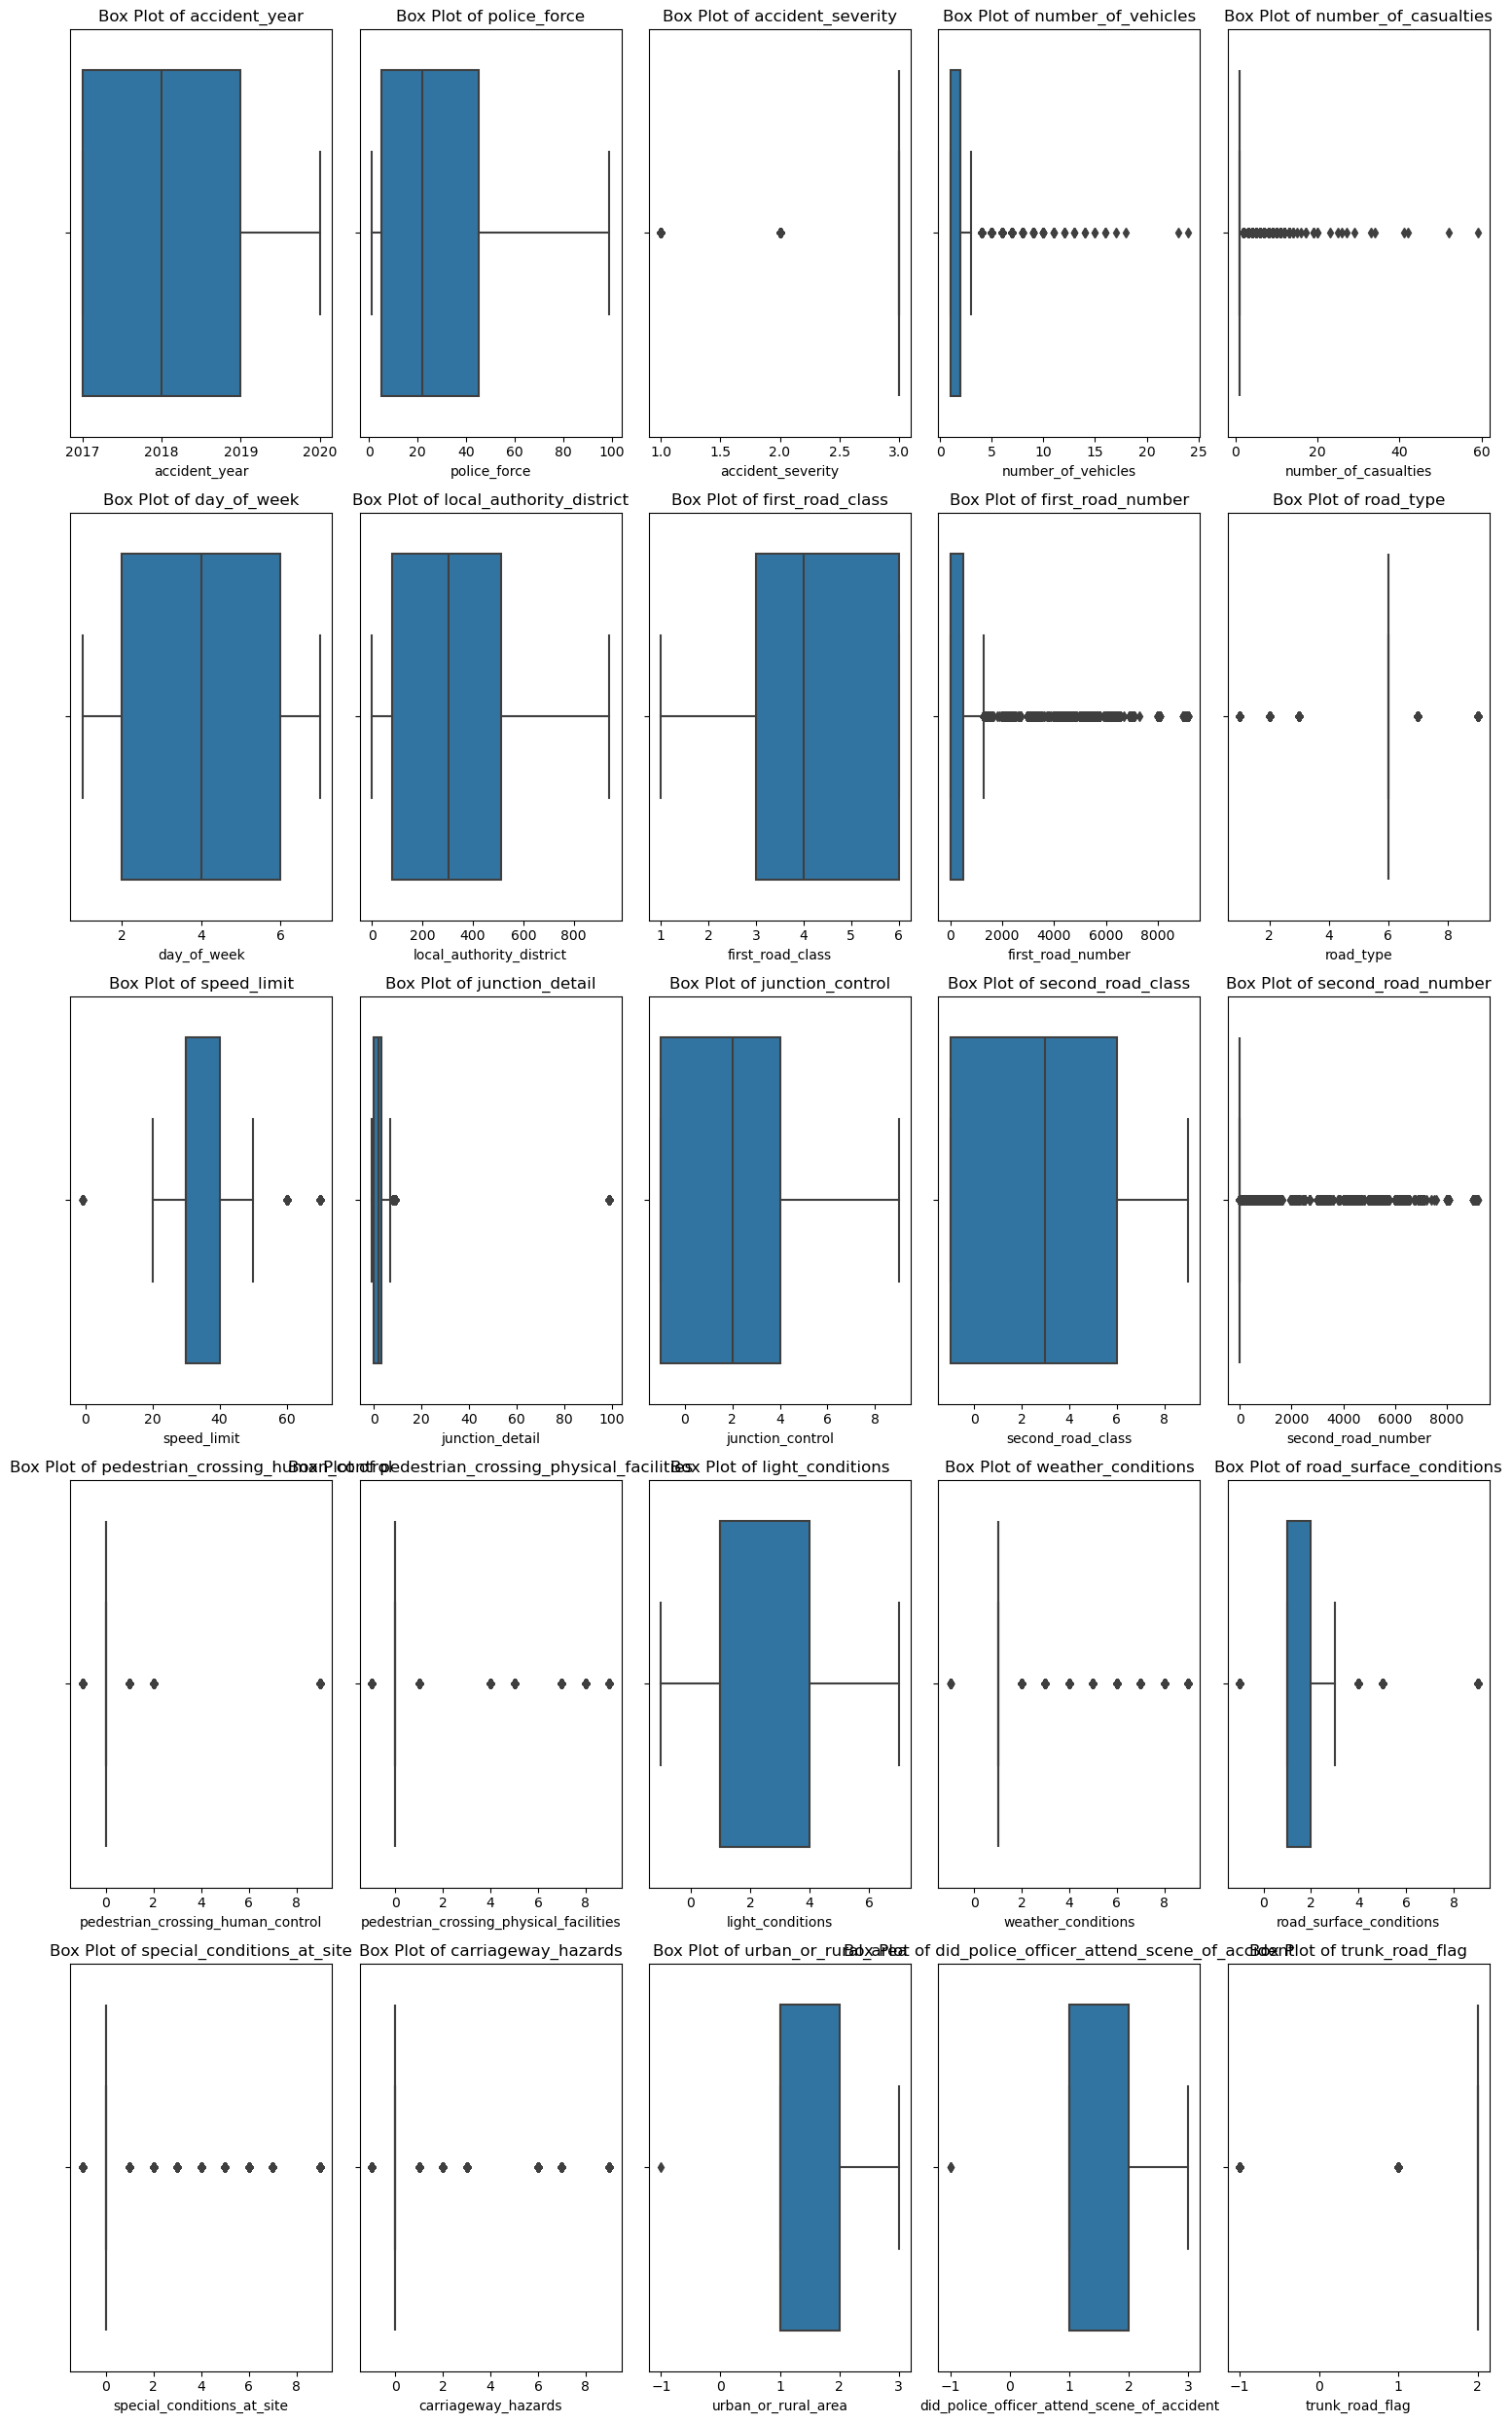

In [53]:
numerical_cols = accident.select_dtypes(include=['int64']).columns
cat_cols= accident.select_dtypes(include=['object'])

num_cols = 5  # Number of columns in the grid
num_plots = len(numerical_cols)
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten the 2D array of axes

for ax, col in zip(axes, numerical_cols):
    sns.boxplot(x=accident[col], ax=ax)
    ax.set_title(f'Box Plot of {col}')
    ax.set_xlabel(col)
    
# Hide any unused subplots
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



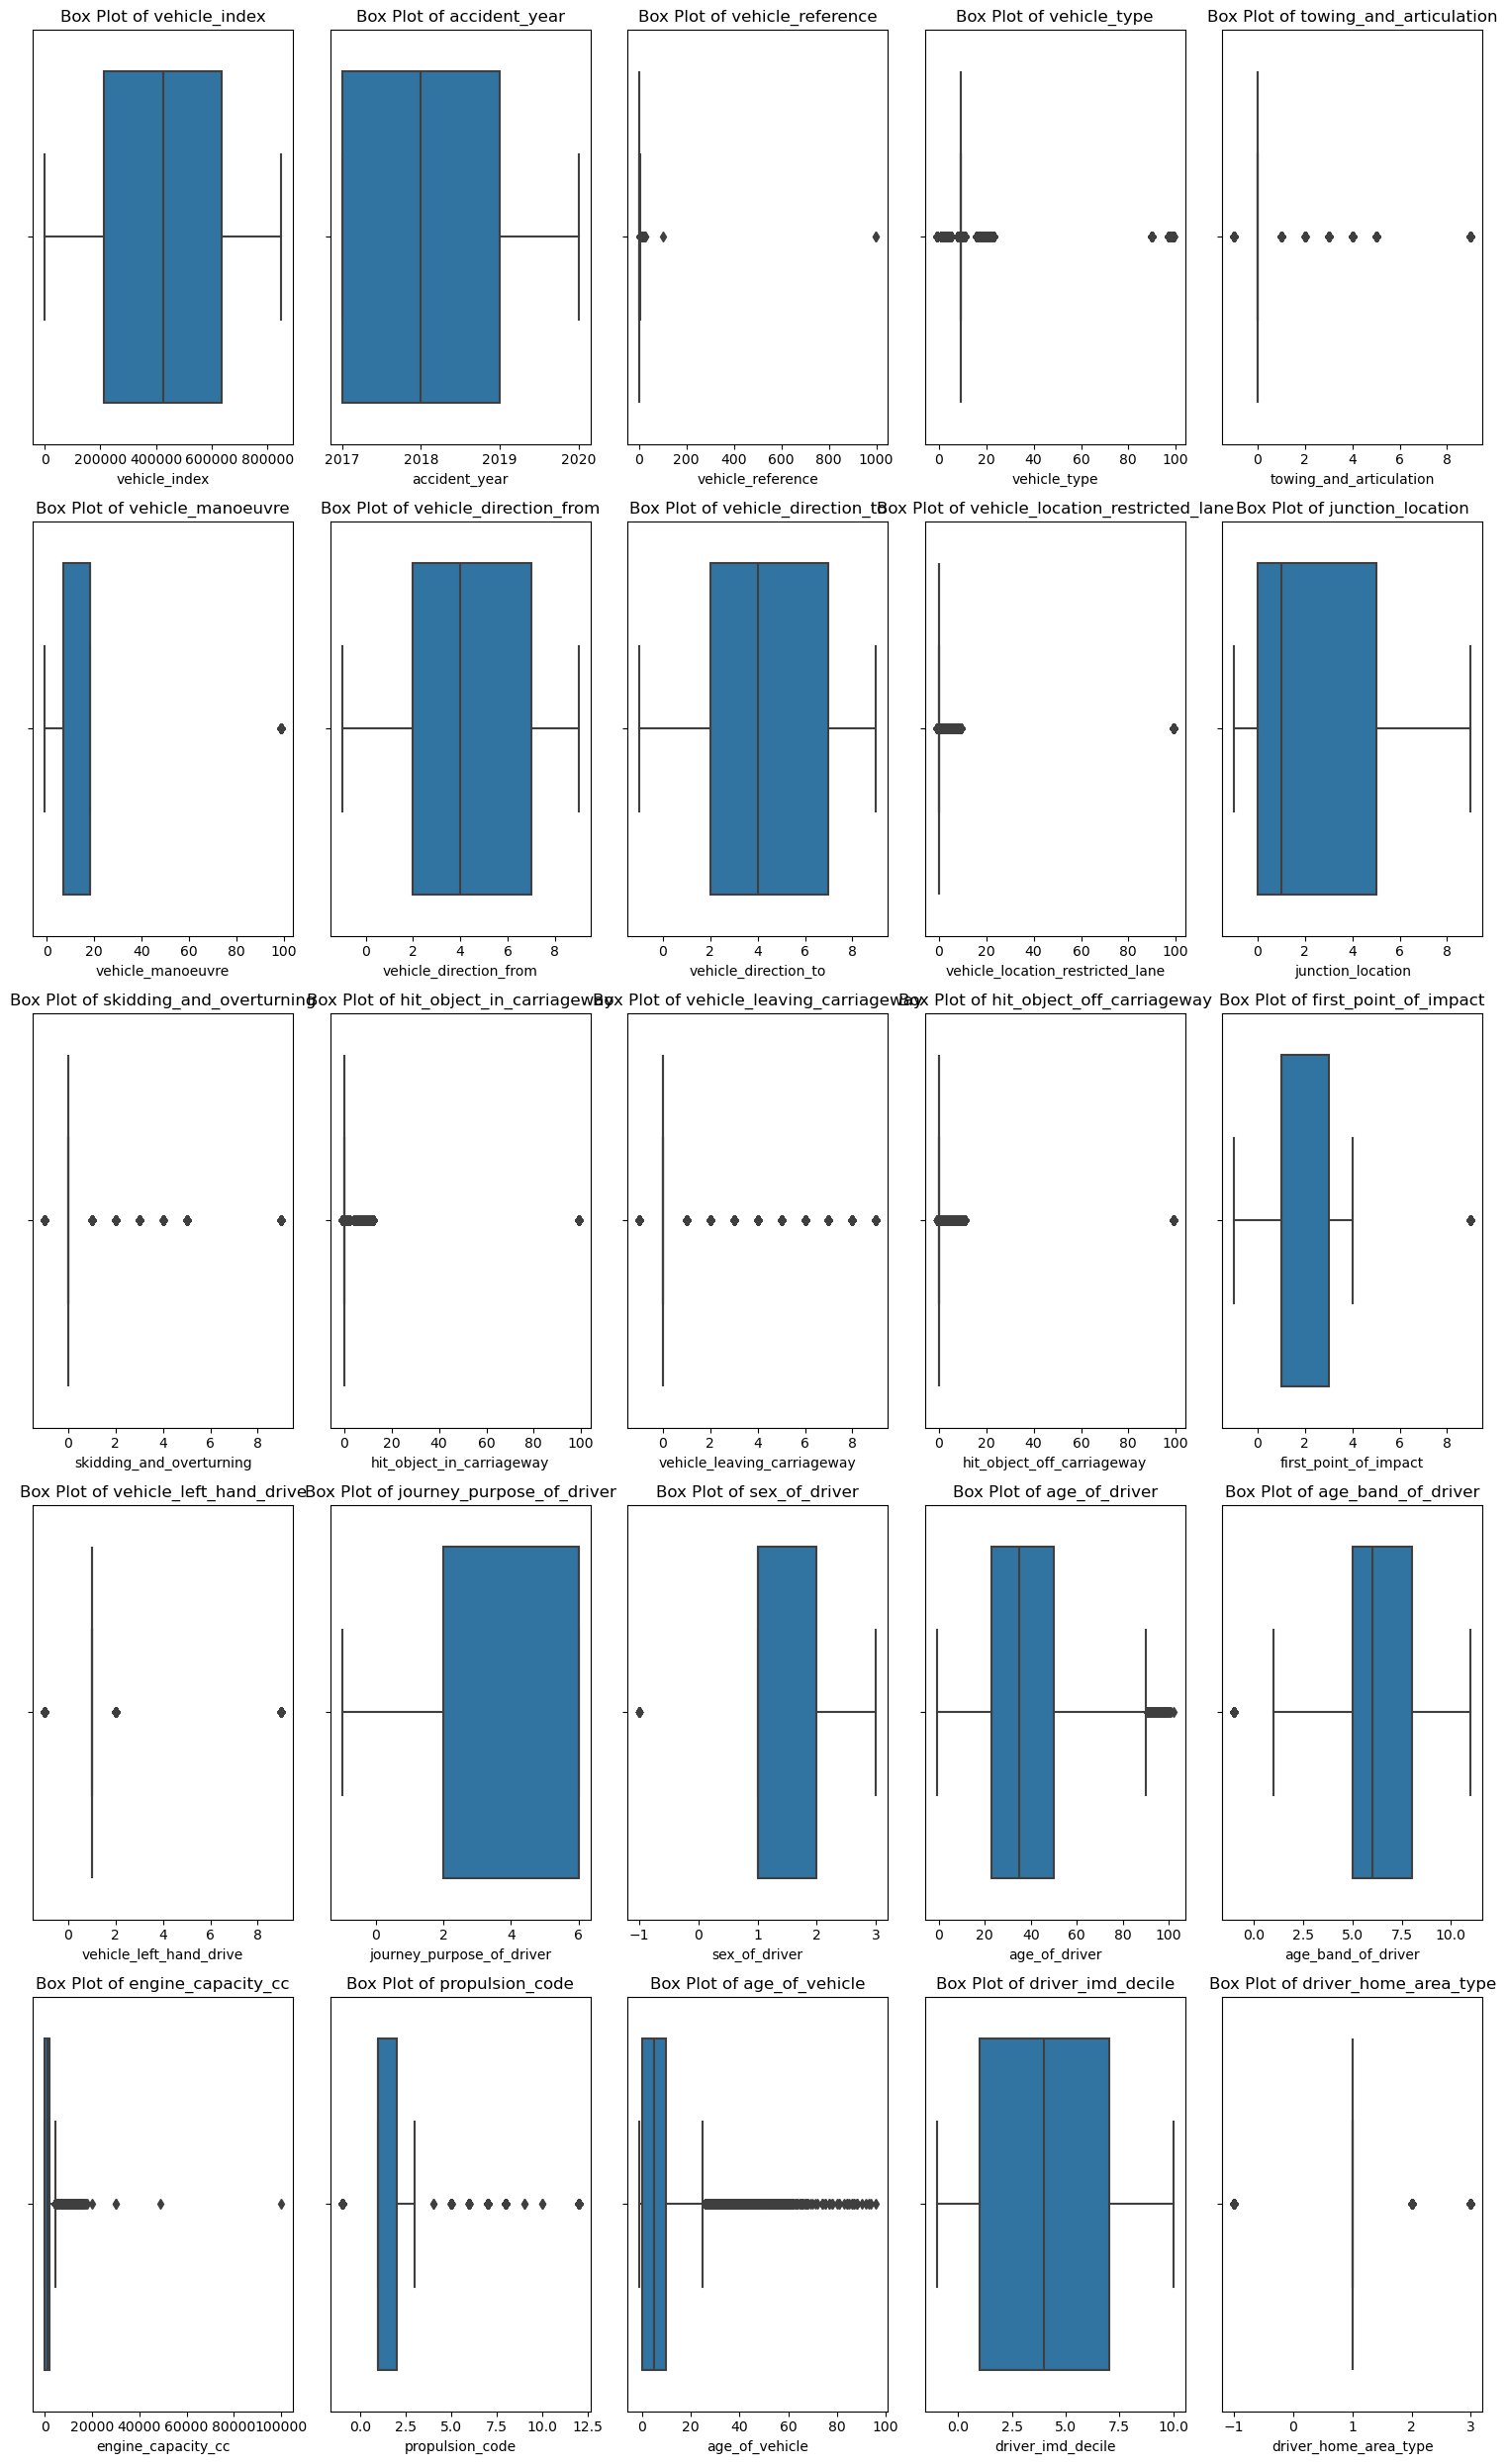

In [54]:
numerical_cols = vehicle.select_dtypes(include=['int64']).columns
cat_cols= vehicle.select_dtypes(include=['object'])

num_cols = 5  # Number of columns in the grid
num_plots = len(numerical_cols)
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten the 2D array of axes

for ax, col in zip(axes, numerical_cols):
    sns.boxplot(x=vehicle[col], ax=ax)
    ax.set_title(f'Box Plot of {col}')
    ax.set_xlabel(col)
    
# Hide any unused subplots
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



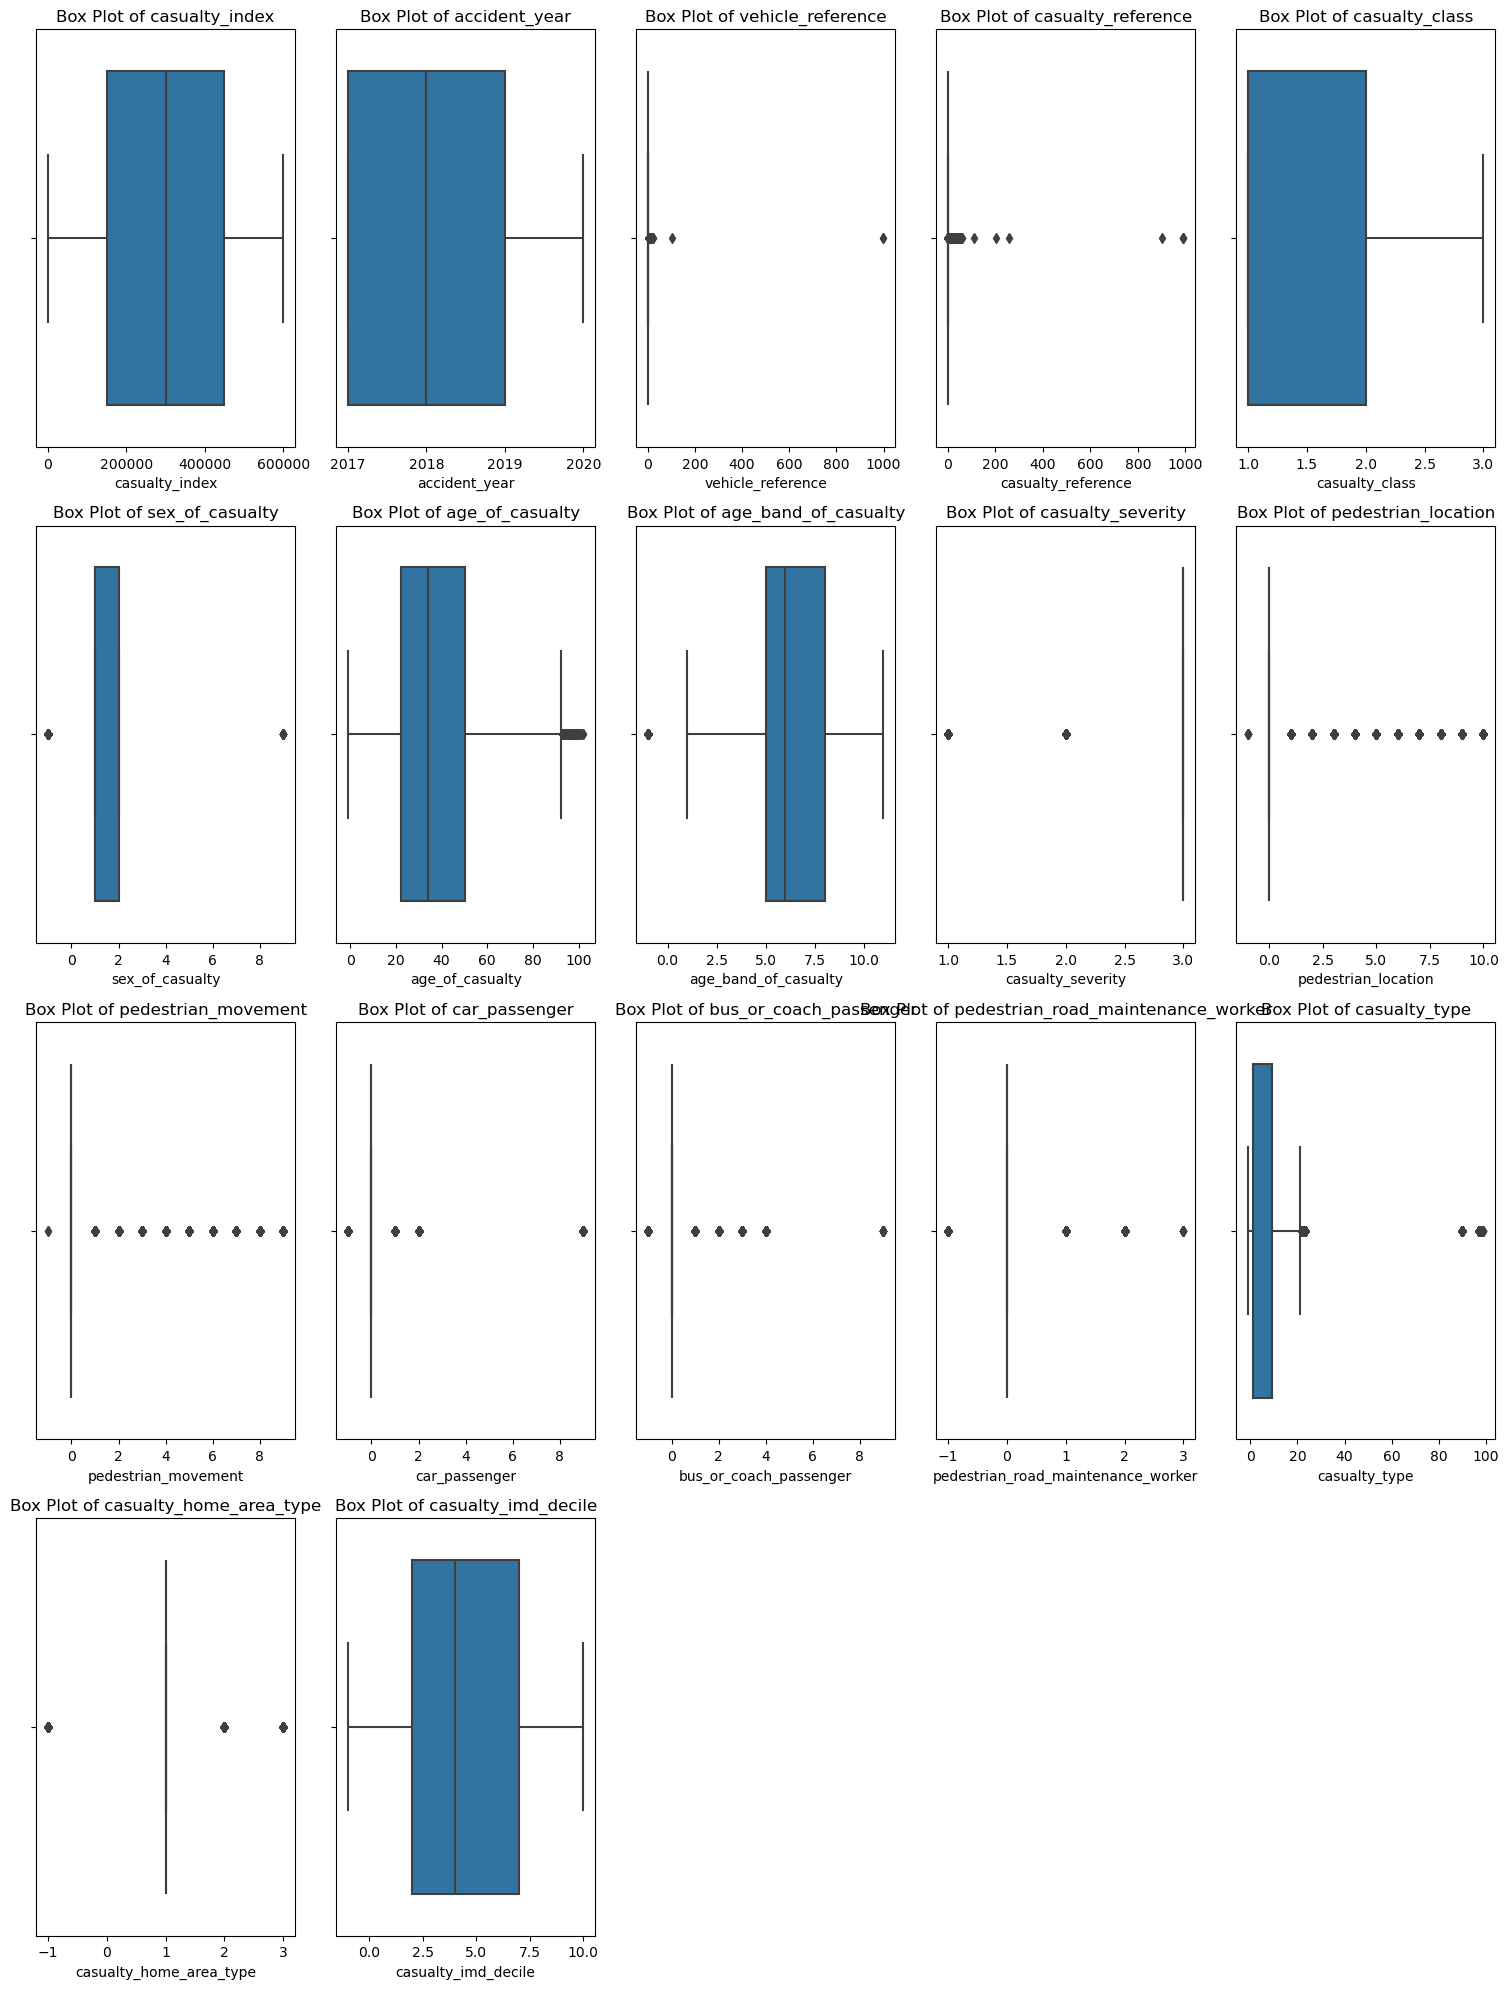

In [55]:
numerical_cols = casualty.select_dtypes(include=['int64']).columns
cat_cols= vehicle.select_dtypes(include=['object'])

num_cols = 5  # Number of columns in the grid
num_plots = len(numerical_cols)
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten the 2D array of axes

for ax, col in zip(axes, numerical_cols):
    sns.boxplot(x=casualty[col], ax=ax)
    ax.set_title(f'Box Plot of {col}')
    ax.set_xlabel(col)
    
# Hide any unused subplots
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



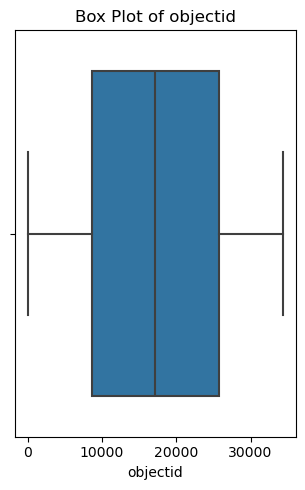

In [56]:
numerical_cols = lsoa.select_dtypes(include=['int64']).columns
cat_cols= vehicle.select_dtypes(include=['object'])

num_cols = 5  # Number of columns in the grid
num_plots = len(numerical_cols)
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten the 2D array of axes

for ax, col in zip(axes, numerical_cols):
    sns.boxplot(x=lsoa[col], ax=ax)
    ax.set_title(f'Box Plot of {col}')
    ax.set_xlabel(col)
    
# Hide any unused subplots
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



## Bivariate Analysis 

In [71]:

# Select numerical columns
numerical_columns = accident.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['accident_year', 'location_easting_osgr', 'location_northing_osgr',
       'longitude', 'latitude', 'police_force', 'accident_severity',
       'number_of_vehicles', 'number_of_casualties', 'day_of_week',
       'local_authority_district', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag'],
      dtype='object')


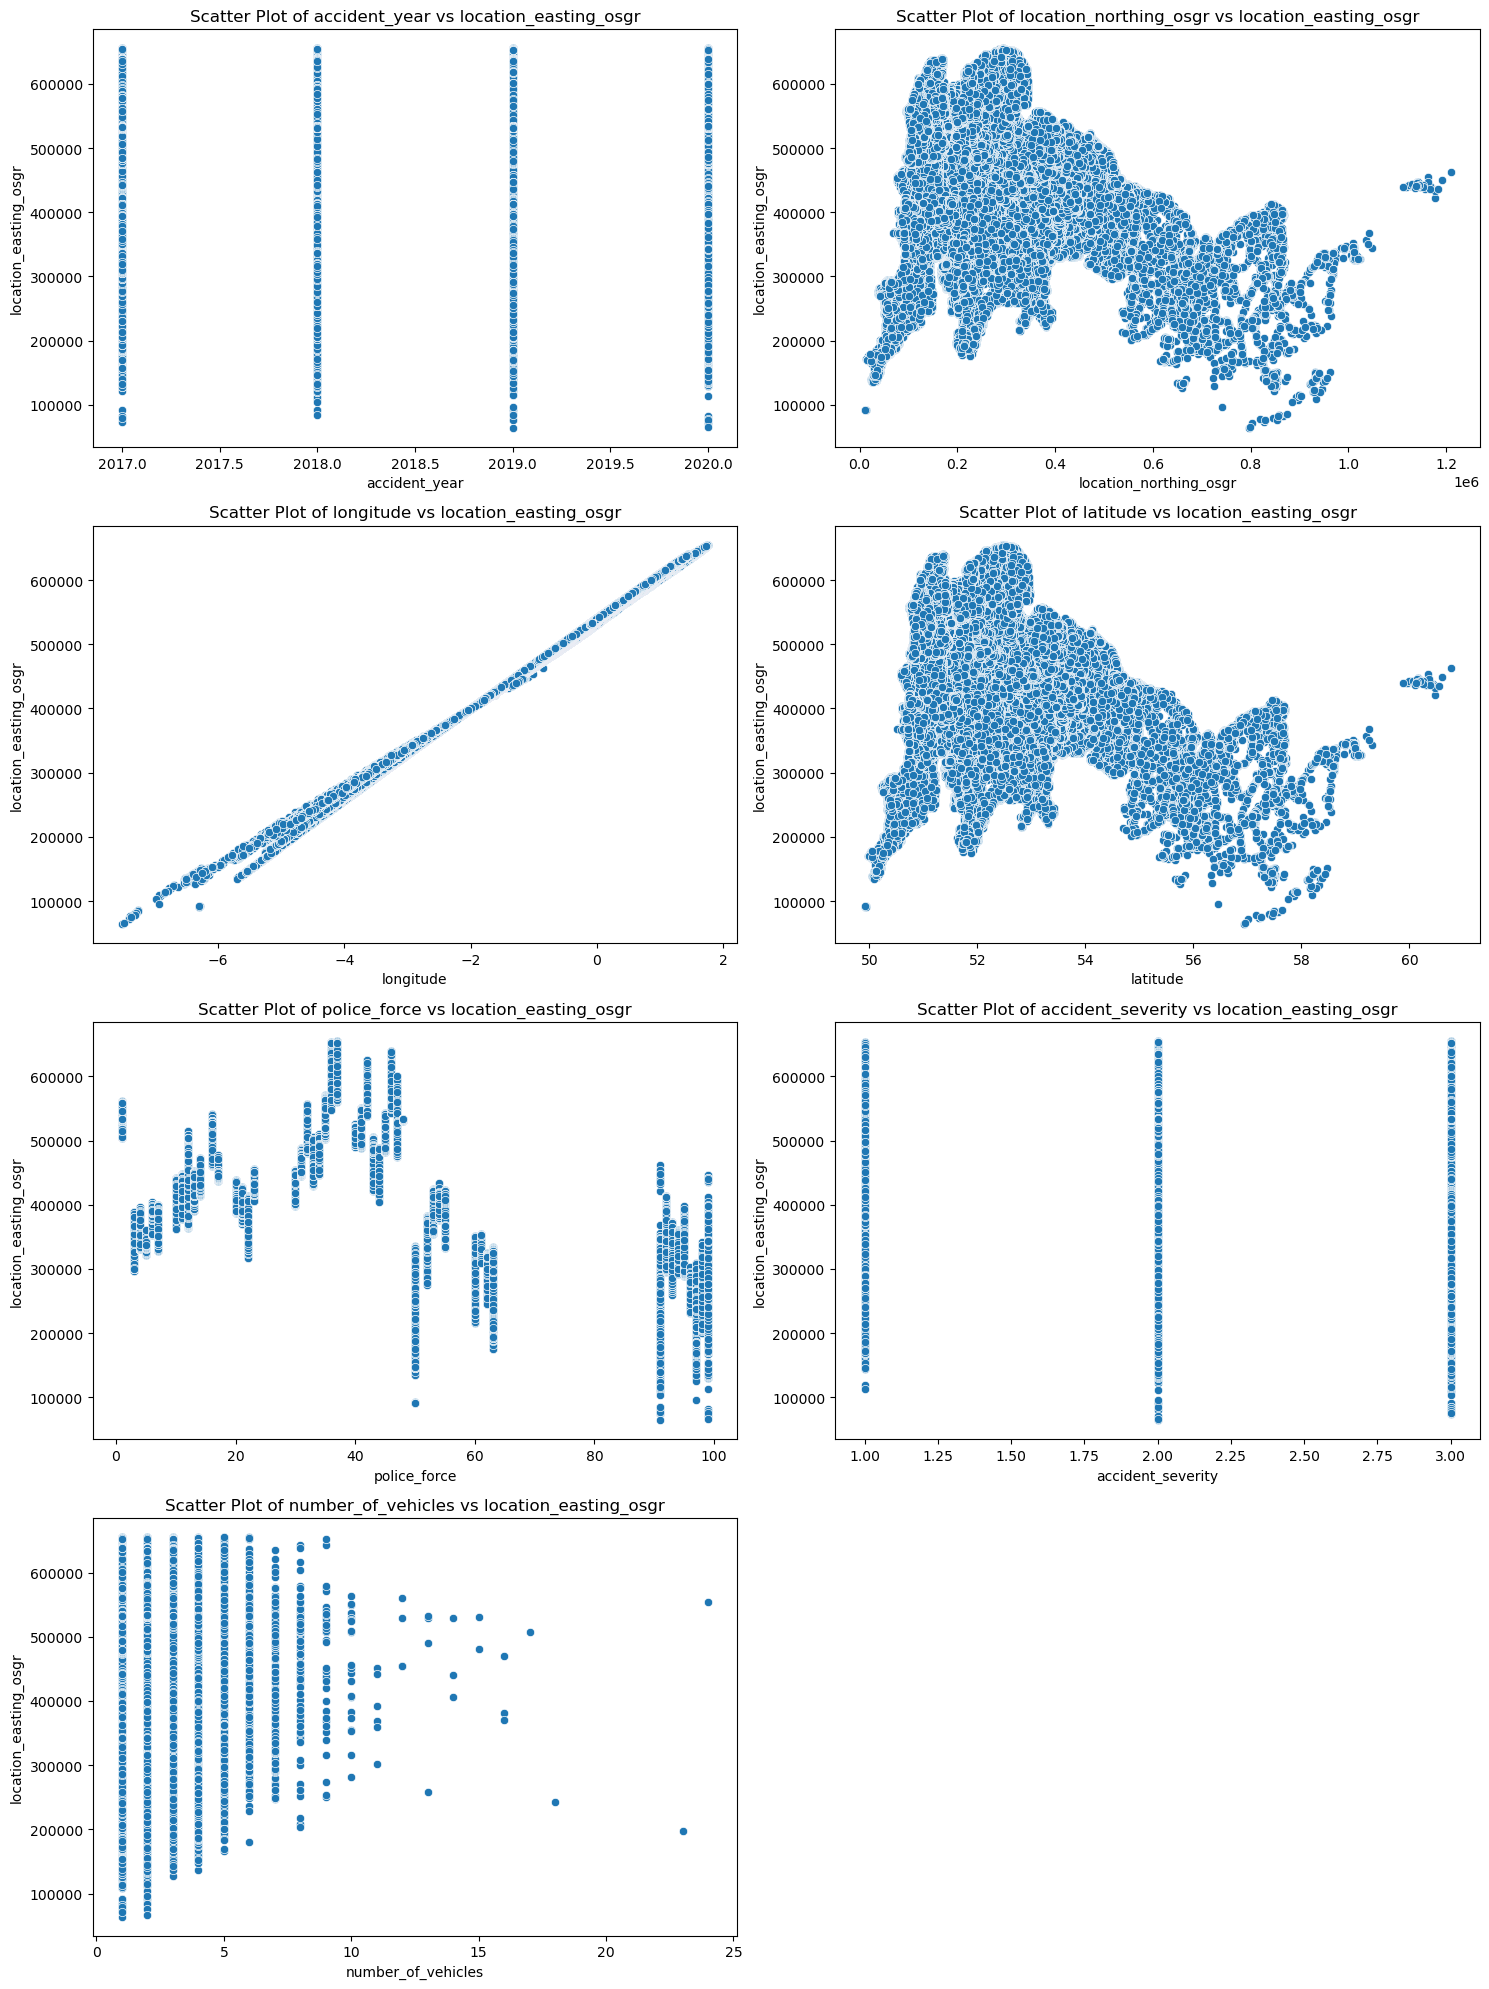

In [75]:
numerical_cols=['accident_year', 'location_easting_osgr', 'location_northing_osgr',
       'longitude', 'latitude', 'police_force', 'accident_severity',
       'number_of_vehicles', ]

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'accident' is your DataFrame
# Select numerical columns to plot against 'accident_year'
numerical_cols = ['accident_year', 'location_easting_osgr', 'location_northing_osgr',
                  'longitude', 'latitude', 'police_force', 'accident_severity',
                  'number_of_vehicles']

# Specify the column to plot against
target_column = 'location_easting_osgr'

# Remove the target column from the numerical columns list
plot_columns = [col for col in numerical_cols if col != target_column]

# Determine the number of rows and columns for the grid layout
num_cols = 2  # Number of columns in the grid
num_plots = len(plot_columns)
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot each column against the target column
for ax, col in zip(axes, plot_columns):
    sns.scatterplot(data=accident, x=col, y=target_column, ax=ax)
    ax.set_title(f'Scatter Plot of {col} vs {target_column}')
    ax.set_xlabel(col)
    ax.set_ylabel(target_column)

# Hide any unused subplots
for i in range(len(plot_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


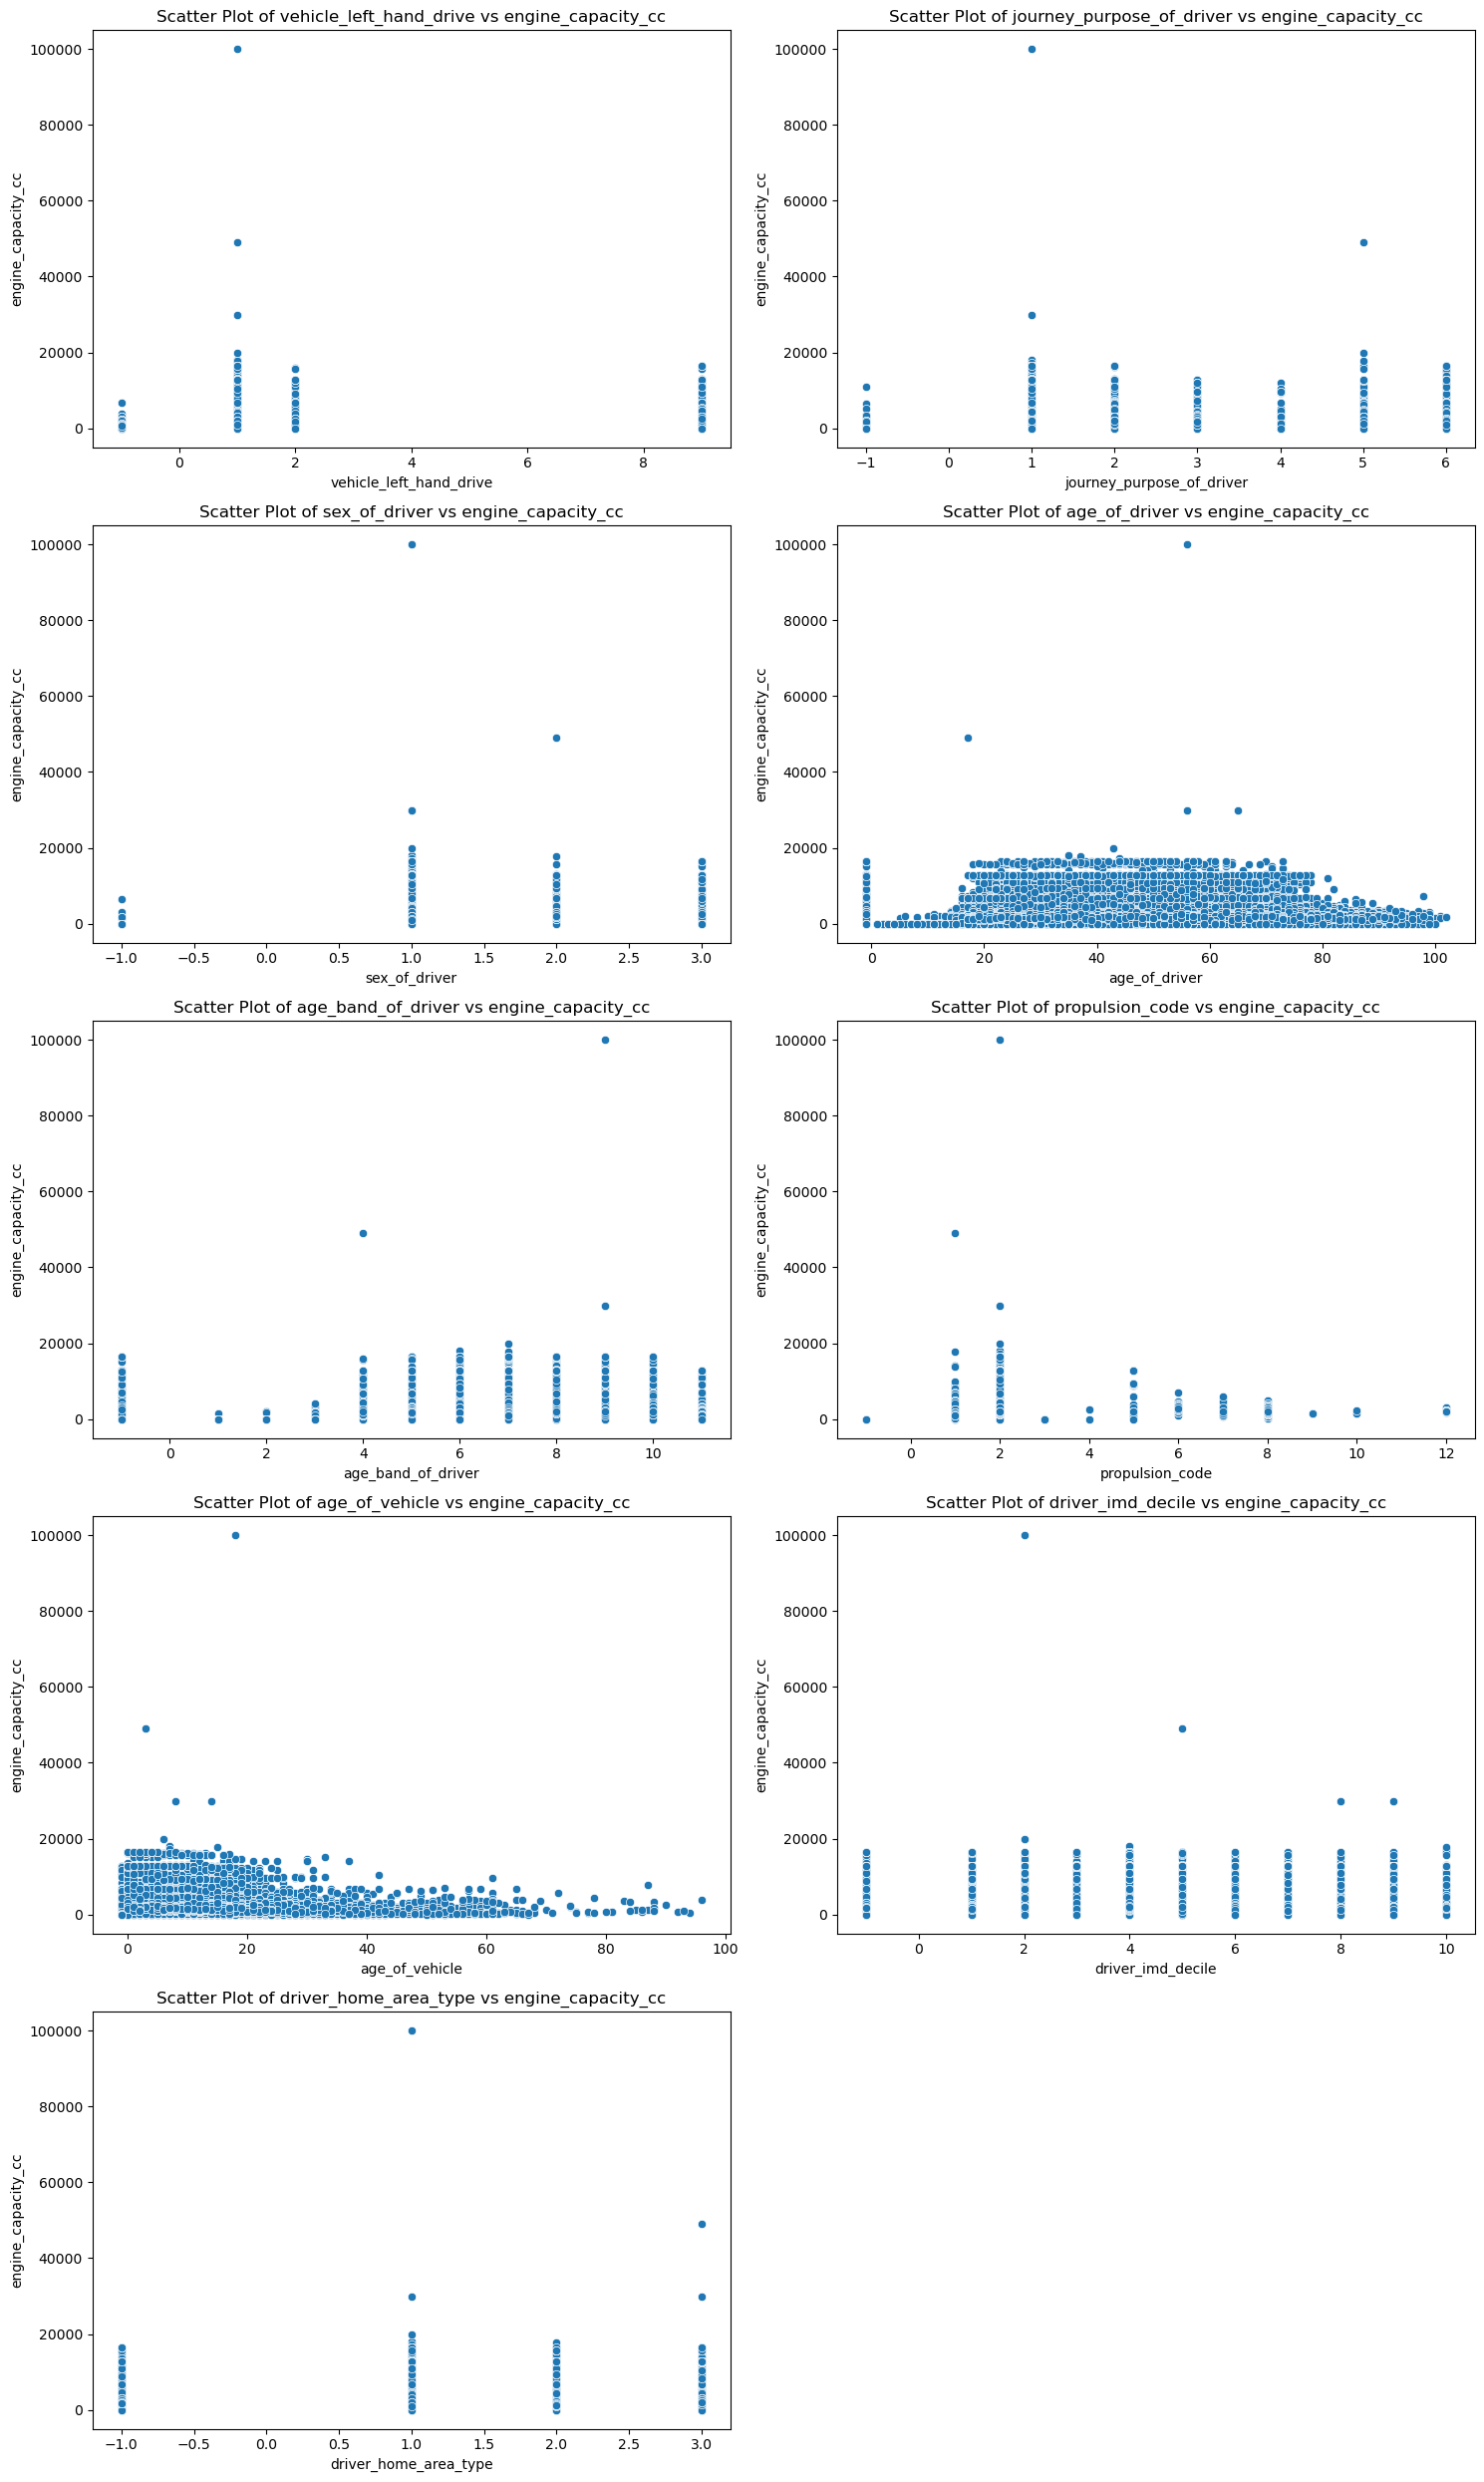

In [77]:

# Assuming 'accident' is your DataFrame
# Select numerical columns to plot against 'accident_year'
numerical_cols=['vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'driver_imd_decile', 'driver_home_area_type' ]

# Specify the column to plot against
target_column = 'engine_capacity_cc'

# Remove the target column from the numerical columns list
plot_columns = [col for col in numerical_cols if col != target_column]

# Determine the number of rows and columns for the grid layout
num_cols = 2  # Number of columns in the grid
num_plots = len(plot_columns)
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot each column against the target column
for ax, col in zip(axes, plot_columns):
    sns.scatterplot(data=vehicle, x=col, y=target_column, ax=ax)
    ax.set_title(f'Scatter Plot of {col} vs {target_column}')
    ax.set_xlabel(col)
    ax.set_ylabel(target_column)

# Hide any unused subplots
for i in range(len(plot_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [78]:

# Select numerical columns
numerical_columns = casualty.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['casualty_index', 'accident_year', 'vehicle_reference',
       'casualty_reference', 'casualty_class', 'sex_of_casualty',
       'age_of_casualty', 'age_band_of_casualty', 'casualty_severity',
       'pedestrian_location', 'pedestrian_movement', 'car_passenger',
       'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker',
       'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile'],
      dtype='object')


## Multivariate Analysis

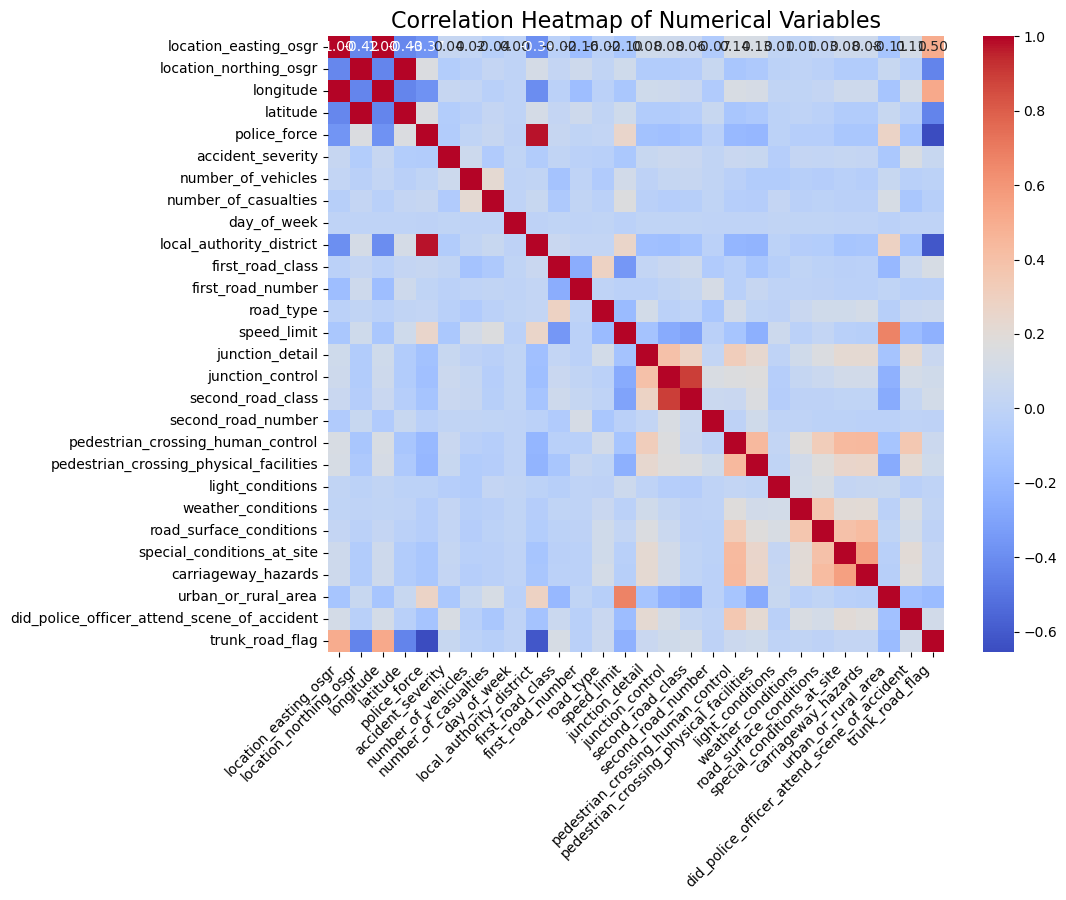

In [81]:
# Select the numerical columns
numerical_cols = ['location_easting_osgr', 'location_northing_osgr',
       'longitude', 'latitude', 'police_force', 'accident_severity',
       'number_of_vehicles', 'number_of_casualties', 'day_of_week',
       'local_authority_district', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag']

# Compute the correlation matrix
corr_matrix = accident[numerical_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

# Add title and labels
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()


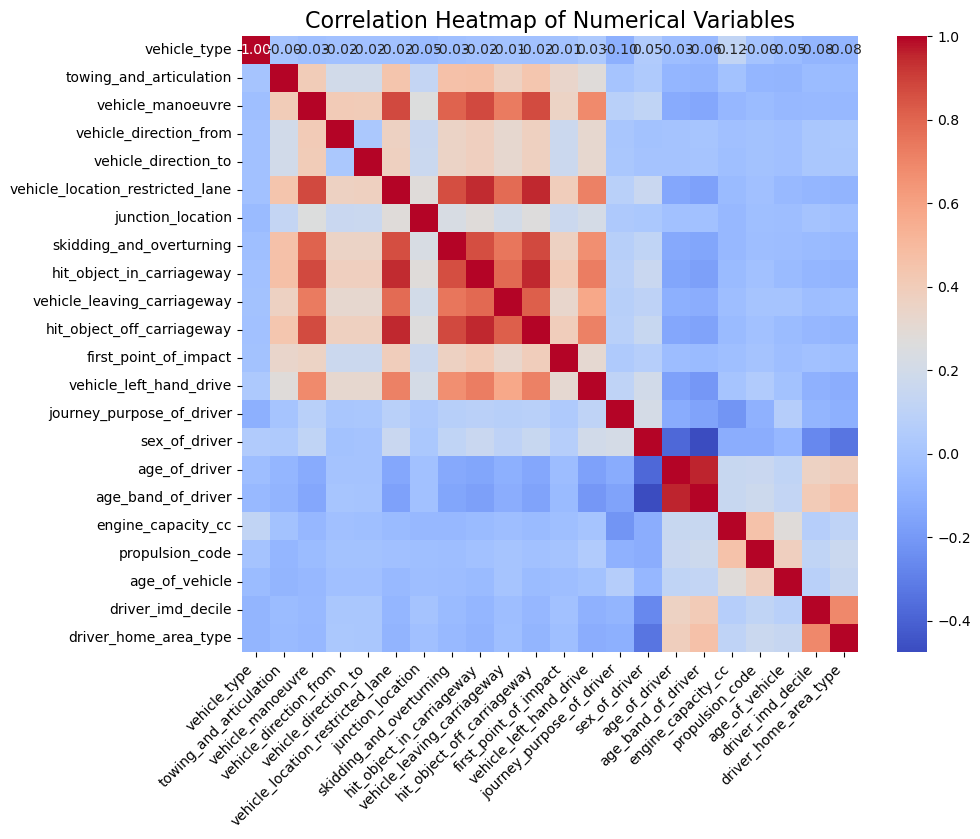

In [83]:
# Select the numerical columns
numerical_cols = ['vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'driver_imd_decile', 'driver_home_area_type']

# Compute the correlation matrix
corr_matrix = vehicle[numerical_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

# Add title and labels
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()


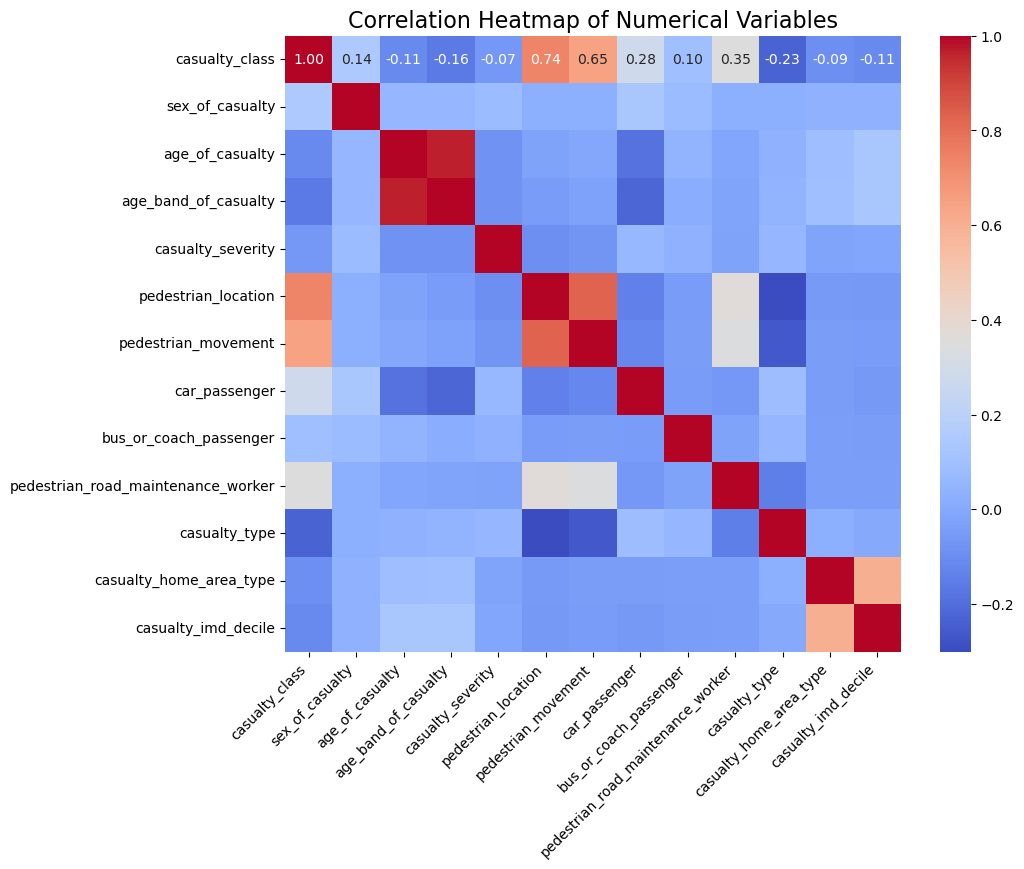

In [85]:
# Select the numerical columns
numerical_cols = ['casualty_class', 'sex_of_casualty',
       'age_of_casualty', 'age_band_of_casualty', 'casualty_severity',
       'pedestrian_location', 'pedestrian_movement', 'car_passenger',
       'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker',
       'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile']

# Compute the correlation matrix
corr_matrix = casualty[numerical_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

# Add title and labels
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()
